# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#15C3BA"><b><span style='color:#FFFFFF'>(10/14) |</span></b> <b>Практика</b></div>

### <b>Задание <span style='color:#15C3BA'>2.10.3</span></b> 
    
- Загрузите данные train.csv, найдите признак, обозначающий баланс (balance due)
- Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
- **Возьмите корень у положительных значений**, найдите **медианное и среднее значение**
- В качестве ответа укажите модуль разницы этих значений.

In [39]:
import numpy as np
import pandas as pd

vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)

print(vis_data.columns)
print(vis_data['balance_due'].shape)

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')
(250306,)


In [40]:
vis_data.dtypes

ticket_id                       int64
agency_name                    object
inspector_name                 object
violator_name                  object
violation_street_number       float64
violation_street_name          object
violation_zip_code            float64
mailing_address_str_number    float64
mailing_address_str_name       object
city                           object
state                          object
zip_code                       object
non_us_str_code                object
country                        object
ticket_issued_date             object
hearing_date                   object
violation_code                 object
violation_description          object
disposition                    object
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
payment_amou

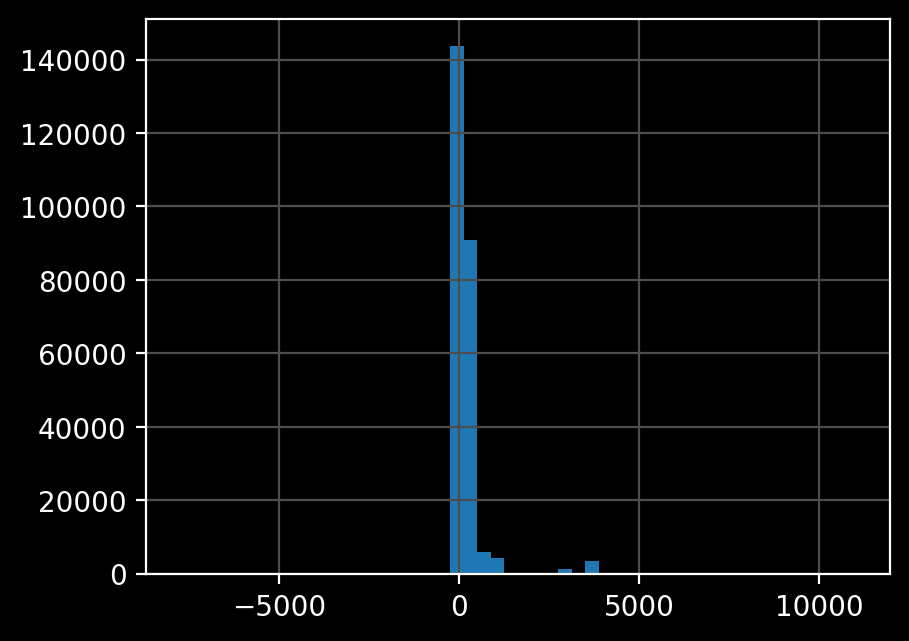

In [41]:
vis_data['balance_due'].hist(bins=50)

In [42]:
negative_balance = vis_data[vis_data['balance_due'] > 0]['balance_due']
negative_balance = np.sqrt(negative_balance)
print(negative_balance.mean())
print(negative_balance.median())
print(np.abs(negative_balance.median()-negative_balance.mean()))

17.011653135663007
17.46424919657298
0.45259606090997195


### <b>Задание <span style='color:#15C3BA'>2.10.4</span></b> 

- Вернемся к первичному анализу наших **данных по квартирам**, выставленным на продажу.
- Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать **визуализацию с помощью боксплотов** 
- Постройте **боксплоты для распределения цен по этим районами** (должно получиться четыре боксплота - по одному для каждого района). 
- На основании полученных диаграмм ответьте на вопросы ниже.

In [48]:
import os; os.listdir()

['latlons.csv.xls',
 'data_flats.csv',
 'm2_part3_visualization.ipynb',
 'train.csv',
 '.ipynb_checkpoints',
 'Untitled.ipynb']

In [72]:
df = pd.read_csv('data_flats.csv',delimiter=';')
suburb_dict = dict(tuple(df.groupby('sub_area')))
df.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'university_km', 'workp

In [73]:
# находим наши районы 
suburb_dict.keys()

dict_keys(['Ajeroport', 'Akademicheskoe', 'Alekseevskoe', "Altuf'evskoe", 'Arbat', 'Babushkinskoe', 'Basmannoe', 'Begovoe', 'Beskudnikovskoe', 'Bibirevo', 'Birjulevo Vostochnoe', 'Birjulevo Zapadnoe', 'Bogorodskoe', 'Brateevo', 'Butyrskoe', 'Caricyno', 'Cheremushki', "Chertanovo Central'noe", 'Chertanovo Juzhnoe', 'Chertanovo Severnoe', 'Danilovskoe', 'Dmitrovskoe', 'Donskoe', 'Dorogomilovo', 'Filevskij Park', 'Fili Davydkovo', 'Gagarinskoe', "Gol'janovo", 'Golovinskoe', 'Hamovniki', 'Horoshevo-Mnevniki', 'Horoshevskoe', 'Hovrino', 'Ivanovskoe', 'Izmajlovo', 'Jakimanka', 'Jaroslavskoe', 'Jasenevo', 'Juzhnoe Butovo', 'Juzhnoe Medvedkovo', 'Juzhnoe Tushino', 'Juzhnoportovoe', 'Kapotnja', "Kon'kovo", 'Koptevo', 'Kosino-Uhtomskoe', 'Kotlovka', "Krasnosel'skoe", 'Krjukovo', 'Krylatskoe', 'Kuncevo', 'Kurkino', "Kuz'minki", 'Lefortovo', 'Levoberezhnoe', 'Lianozovo', 'Ljublino', 'Lomonosovskoe', 'Losinoostrovskoe', "Mar'ina Roshha", "Mar'ino", 'Marfino', 'Matushkino', 'Meshhanskoe', 'Metrogoro

In [74]:
# Выбираем наше подмножество и проверяем 
ldf = df[df['sub_area'].isin(['Lefortovo','Perovo','Basmannoe','Bogorodskoe'])]
display(ldf.head())
ldf.sub_area.value_counts()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
14,15,31,21.0,3.0,Lefortovo,1768.0,4,4564.0,4,0,1575.0,5,1,12,1,0,7,14,1.023328,0.590130,7.081564,0.590130,0.196604,0.797255,1.479844,0.385974,0.256814,0.904529,10.854344,0.175237,2.102844,8.276662,0.820600,3.331354,3.874626,5.469216,8.708683,0.509649,0.376861,0.667945,3.559067,1.660760,0.937307,1.658765,0.510377,2.359491,0.600306,0.317270,1.028406,0.797255,1.510980,0.751314,2.883608,1.895468,poor,5000000
28,29,73,38.0,15.0,Bogorodskoe,3107.0,7,7277.0,9,0,NaN,1,0,8,4,0,2,4,1.420364,1.033409,11.302103,0.941842,0.074910,0.307315,1.697309,0.037287,0.538698,2.928791,35.145490,0.226765,2.721183,6.032548,4.535959,6.539704,7.280130,9.068352,16.184702,4.611625,1.377264,1.294969,3.522403,1.755559,0.298415,0.438693,3.731153,1.534788,1.058810,1.058810,0.260442,0.307315,1.153278,0.438261,4.161080,4.513773,poor,8254400
56,57,56,39.0,4.0,Bogorodskoe,3107.0,7,7277.0,9,0,NaN,1,0,8,4,0,2,4,0.580906,0.190834,2.290010,0.190834,0.065045,0.233796,2.238603,0.268605,0.318591,3.175258,38.103095,0.195171,2.342053,5.322075,5.265709,7.238252,7.983795,9.766482,22.040125,5.648255,1.355480,2.139876,4.559033,2.771319,0.829620,0.967180,4.099181,1.756734,0.378096,0.512312,0.653392,0.233796,1.715970,0.967472,5.197710,5.253872,poor,2000000
83,84,66,42.0,7.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,2.223362,1.036794,12.441523,1.036794,0.196318,0.937935,2.765772,0.639098,0.590355,2.097287,25.167449,0.336477,4.037727,8.624305,1.018012,3.272049,4.015050,5.798406,11.369609,2.717274,0.296969,1.357555,2.189405,1.569008,0.166448,0.952254,2.012469,0.937935,0.555870,0.360334,1.040341,1.175502,0.835839,0.640938,1.869625,0.700781,poor,990000


Bogorodskoe    305
Perovo         247
Lefortovo      119
Basmannoe       98
Name: sub_area, dtype: int64

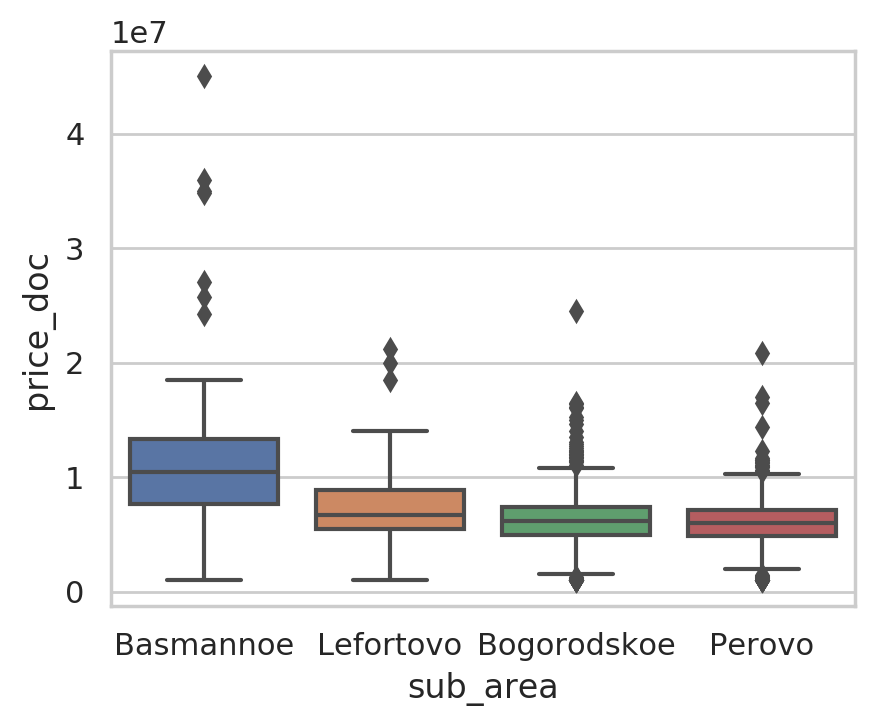

In [77]:
import seaborn as sns; sns.set(style='whitegrid')

sns.boxplot(x=ldf["sub_area"],y=ldf["price_doc"])

**Отвечаем на поставленные вопросы**

- В каком районе разброс цен самый болшой? **Басманное**
- В каком районе самая низкая медианная цена? **Петрово**